In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools
from collections.abc import Iterable

sns.set_style("darkgrid")

pd.set_option('max_columns', None)

In [2]:
def flatten_list(l):
    
    def flatten(l):
        for el in l:
            if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
                yield from flatten(el)
            else:
                yield el
                
    flat_l = flatten(l)
    
    return list(flat_l)

In [3]:
import traceback

def get_relevant_columns_by_config(config, dataframe):
    try:
        if config['i_net_nas'] == False:
            config.pop('i_net_nas_trials')
    except:
        pass
    
    for key, value in config.items():
        try:
            if isinstance(value, list):
                if isinstance(value[0], str):
                    dataframe_string_query = key + ' == "' + str(value[0]) + '"'
                    for dataframe_string in value[1:]:
                        dataframe_string_query += ' | ' + key + ' == "' + str(dataframe_string) + '"'

                    dataframe = dataframe.query(dataframe_string_query)
                else:
                    dataframe = dataframe[dataframe[key].isin(value)]
                    
            else:
                dataframe = dataframe[dataframe[key] == value]
        except:
            traceback.print_exc()
        
    return dataframe


In [4]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot, aspect=1.5, col_wrap=2):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=col_wrap,
                      aspect=aspect,
                      ##legend_out=False,
                     )    
    indexes = np.unique(data_reduced[hue], return_index=True)[1]
    hue_order = [data_reduced[hue].values[index] for index in sorted(indexes)]
        
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=hue_order,#np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          #order=data_reduced[order_columnname],
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [5]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

#results_summary = pd.read_csv('./results_summary-TEST.csv', delimiter=';')
results_summary = pd.read_csv('./results_summary.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)
results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


results_summary.head(5)

/tmp/ipykernel_3728487/3846460482.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


function_family_maximum_depth  function_family_beta  \
0                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   

  function_family_dt_type  \
0                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             456                        32   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   

   data_data_generation_filtering  data_fixed_class_probability  \
0                            True                          True   

   data_weighted_data_generation  data_shift_distrib data_dt_type_train  \
0                          False               False            vanilla   

   data_maximum_depth_train  data_decision_sparsity_train  \
0                         4                             1   

  data_function_generation_type  \
0                  distribution   

                              data_distribution_list  \
0  ['uniform', 'normal', 'gamma', 'beta', 'poisson']   

                         data_distribution_list_eval  data_objective  \
0  ['uniform', 'normal', 'gamma', 'beta', 'poisson']  classification   

   data_x_max  data_x_min data_x_distrib  data_lambda_dataset_size  \
0           1           0        uniform                      5000   

   data_number_of_generated_datasets  data_noise_injected_level  \
0                              10000                          0   

  data_noise_injected_type  data_data_noise  data_distrib_param_max  \
0          flip_percentage                0                       5   

   lambda_net_epochs_lambda  lambda_net_early_stopping_lambda  \
0                      1000                              True   

   lambda_net_early_stopping_min_delta_lambda  lambda_net_batch_lambda  \
0                                       0.001                       64   

   lambda_net_dropout_lambda lambda_net_lambda_network_layers  \
0                          0                            [128]   

   lambda_net_use_batchnorm_lambda lambda_net_optimizer_lambda  \
0                            False                        adam   

  lambda_net_loss_lambda  lambda_net_number_of_lambda_weights  \
0    binary_crossentropy                                 4353   

   lambda_net_number_initializations_lambda  \
0                                         1   

   lambda_net_number_of_trained_lambda_nets             i_net_dense_layers  \
0                                     10000  [1024, 1024, 256, 2048, 2048]   

       i_net_dropout                   i_net_hidden_activation  \
0  [0, 0, 0, 0, 0.3]  ['relu', 'relu', 'relu', 'relu', 'relu']   

  i_net_optimizer  i_net_learning_rate  i_net_separate_weight_bias  \
0         rmsprop                0.001                       False   

  i_net_convolution_layers i_net_lstm_layers  i_net_additional_hidden  \
0                     None              None                    False   

            i_net_loss        i_net_metrics  i_net_epochs  \
0  binary_crossentropy  ['binary_accuracy']             5   

   i_net_early_stopping  i_net_batch_size  i_net_interpretation_dataset_size  \
0                  True               256                              10000   

   i_net_test_size  i_net_evaluate_distribution  \
0               10                         True   

   i_net_force_evaluate_real_world  i_net_function_representation_type  \
0                            False                                   3   

   i_net_normalize_lambda_nets  i_net_optimize_decision_functio

In [6]:
results_summary.head(5)

function_family_maximum_depth  function_family_beta  \
0                              3                     1   

   function_family_decision_sparsity  function_family_fully_grown  \
0                                  1                         True   

  function_family_dt_type  \
0                 vanilla   

   function_family_basic_function_representation_length  \
0                                                 22      

   function_family_function_representation_length  data_number_of_variables  \
0                                             456                        32   

   data_num_classes data_categorical_indices  data_use_distribution_list  \
0                 2                       []                        True   

   data_random_parameters_distribution  data_max_distributions_per_class  \
0                                 True                                 1   

   data_data_generation_filtering  data_fixed_class_probability  \
0                            True                          True   

   data_weighted_data_generation  data_shift_distrib data_dt_type_train  \
0                          False               False            vanilla   

   data_maximum_depth_train  data_decision_sparsity_train  \
0                         4                             1   

  data_function_generation_type  \
0                  distribution   

                              data_distribution_list  \
0  ['uniform', 'normal', 'gamma', 'beta', 'poisson']   

                         data_distribution_list_eval  data_objective  \
0  ['uniform', 'normal', 'gamma', 'beta', 'poisson']  classification   

   data_x_max  data_x_min data_x_distrib  data_lambda_dataset_size  \
0           1           0        uniform                      5000   

   data_number_of_generated_datasets  data_noise_injected_level  \
0                              10000                          0   

  data_noise_injected_type  data_data_noise  data_distrib_param_max  \
0          flip_percentage                0                       5   

   lambda_net_epochs_lambda  lambda_net_early_stopping_lambda  \
0                      1000                              True   

   lambda_net_early_stopping_min_delta_lambda  lambda_net_batch_lambda  \
0                                       0.001                       64   

   lambda_net_dropout_lambda lambda_net_lambda_network_layers  \
0                          0                            [128]   

   lambda_net_use_batchnorm_lambda lambda_net_optimizer_lambda  \
0                            False                        adam   

  lambda_net_loss_lambda  lambda_net_number_of_lambda_weights  \
0    binary_crossentropy                                 4353   

   lambda_net_number_initializations_lambda  \
0                                         1   

   lambda_net_number_of_trained_lambda_nets             i_net_dense_layers  \
0                                     10000  [1024, 1024, 256, 2048, 2048]   

       i_net_dropout                   i_net_hidden_activation  \
0  [0, 0, 0, 0, 0.3]  ['relu', 'relu', 'relu', 'relu', 'relu']   

  i_net_optimizer  i_net_learning_rate  i_net_separate_weight_bias  \
0         rmsprop                0.001                       False   

  i_net_convolution_layers i_net_lstm_layers  i_net_additional_hidden  \
0                     None              None                    False   

            i_net_loss        i_net_metrics  i_net_epochs  \
0  binary_crossentropy  ['binary_accuracy']             5   

   i_net_early_stopping  i_net_batch_size  i_net_interpretation_dataset_size  \
0                  True               256                              10000   

   i_net_test_size  i_net_evaluate_distribution  \
0               10                         True   

   i_net_force_evaluate_real_world  i_net_function_representation_type  \
0                            False                                   3   

   i_net_normalize_lambda_nets  i_net_optimize_decision_functio

In [7]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [8]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

results_summary_inet

function_family_maximum_depth  function_family_decision_sparsity  \
0                              3                                  1   

  function_family_dt_type data_dt_type_train  data_maximum_depth_train  \
0                 vanilla            vanilla                         4   

   data_number_of_variables  data_noise_injected_level  \
0                        32                          0   

  data_function_generation_type data_categorical_indices  \
0                  distribution                       []   

  lambda_net_lambda_network_layers lambda_net_optimizer_lambda  \
0                            [128]                        adam   

              i_net_dense_layers      i_net_dropout  i_net_learning_rate  \
0  [1024, 1024, 256, 2048, 2048]  [0, 0, 0, 0, 0.3]                0.001   

            i_net_loss  i_net_interpretation_dataset_size  \
0  binary_crossentropy                              10000   

   i_net_function_representation_type i_net_data_reshape_version  i_net_nas  \
0                                   3                       None      False   

   i_net_nas_trials  \
0                60   

  evaluation_eval_data_description_eval_data_function_generation_type  \
0                                make_classification                    

   evaluation_eval_data_description_eval_data_noise_injected_level  \
0                                                  0                 

   train_inet_scores_soft_binary_crossentropy  \
0                                    0.685405   

   train_inet_scores_soft_binary_crossentropy_median  \
0                                           0.690439   

   train_inet_scores_binary_crossentropy  \
0                               0.692491   

   train_inet_scores_binary_crossentropy_median  train_inet_scores_accuracy  \
0                                       0.69383                     0.56704   

   train_inet_scores_accuracy_median  train_inet_scores_f1_score  \
0                             0.5568                    0.549999   

   train_inet_scores_f1_score_median  train_inet_scores_runtime  \
0                           0.611955                   0.005459   

   train_inet_scores_runtime_median  \
0                          0.005459   

   valid_inet_scores_soft_binary_crossentropy  \
0                                    0.687614   

   valid_inet_scores_soft_binary_crossentropy_median  \
0                                           0.691122   

   valid_inet_scores_binary_crossentropy  \
0                               0.691265   

   valid_inet_scores_binary_crossentropy_median  valid_inet_scores_accuracy  \
0                                      0.695203                     0.53696   

   valid_inet_scores_accuracy_median  valid_inet_scores_f1_score  \
0                             0.5148                    0.377068   

   valid_inet_scores_f1_score_median  valid_inet_scores_runtime  \
0                            0.44703                   0.008723   

   valid_inet_scores_runtime_median  \
0                          0.008723   

   test_uniform_inet_scores_soft_binary_crossentropy  \
0                                            0.68028   

   test_uniform_inet_scores_soft_binary_crossentropy_median  \
0                                           0.684857          

   test_uniform_inet_scores_binary_crossentropy  \
0                                      0.674851   

   test_uniform_inet_scores_binary_crossentropy_median  \
0                                           0.682899     

   test_uniform_inet_scores_accuracy  \
0                             0.5964   

   test_uniform_inet_scores_accuracy_median  \
0                                     0.559   

   test_uniform_inet_scores_f1_score  \
0                            0.36063   

   test_uniform_inet_scores_f1_score_median  test_uniform_inet_scores_runtime  \
0                                  0.446804                          0.128884   

   test_uniform_inet_scores_runtime_median  \
0                     

In [9]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten_list([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])
results_summary_inet.insert(0, 'technique', ['inet' for _ in range(results_summary_inet.shape[0])])

    
print(results_summary_inet.shape)
results_summary_inet.head(20)

(1, 484)


technique   dt_type  function_family_maximum_depth  \
0      inet  vanilla1                              3   

   function_family_decision_sparsity function_family_dt_type  \
0                                  1                 vanilla   

  data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0            vanilla                         4                        32   

   data_noise_injected_level data_function_generation_type  \
0                          0                  distribution   

  data_categorical_indices lambda_net_lambda_network_layers  \
0                       []                            [128]   

  lambda_net_optimizer_lambda             i_net_dense_layers  \
0                        adam  [1024, 1024, 256, 2048, 2048]   

       i_net_dropout  i_net_learning_rate           i_net_loss  \
0  [0, 0, 0, 0, 0.3]                0.001  binary_crossentropy   

   i_net_interpretation_dataset_size  i_net_function_representation_type  \
0                              10000                                   3   

  i_net_data_reshape_version  i_net_nas  i_net_nas_trials  \
0                       None      False                60   

  evaluation_eval_data_description_eval_data_function_generation_type  \
0                                make_classification                    

   evaluation_eval_data_description_eval_data_noise_injected_level  \
0                                                  0                 

   train_soft_binary_crossentropy  train_soft_binary_crossentropy_median  \
0                        0.685405                               0.690439   

   train_binary_crossentropy  train_binary_crossentropy_median  \
0                   0.692491                           0.69383   

   train_accuracy  train_accuracy_median  train_f1_score  \
0         0.56704                 0.5568        0.549999   

   train_f1_score_median  train_runtime  train_runtime_median  \
0               0.611955       0.005459              0.005459   

   valid_soft_binary_crossentropy  valid_soft_binary_crossentropy_median  \
0                        0.687614                               0.691122   

   valid_binary_crossentropy  valid_binary_crossentropy_median  \
0                   0.691265                          0.695203   

   valid_accuracy  valid_accuracy_median  valid_f1_score  \
0         0.53696                 0.5148        0.377068   

   valid_f1_score_median  valid_runtime  valid_runtime_median  \
0                0.44703       0.008723              0.008723   

   test_uniform_soft_binary_crossentropy  \
0                                0.68028   

   test_uniform_soft_binary_crossentropy_median  \
0                                      0.684857   

   test_uniform_binary_crossentropy  test_uniform_binary_crossentropy_median  \
0                          0.674851                                 0.682899   

   test_uniform_accuracy  test_uniform_accuracy_median  test_uniform_f1_score  \
0                 0.5964                         0.559                0.36063   

   test_uniform_f1_score_median  test_uniform_runtime  \
0                      0.446804              0.128884   

   test_uniform_runtime_median  test_normal_soft_binary_crossentropy  \
0                     0.125536                               0.68028   

   test_normal_soft_binary_crossentropy_median  \
0                                     0.684857   

   test_normal_binary_crossentropy  test_normal_binary_crossentropy_median  \
0                         0.674851                                0.682899   

   test_normal_accuracy  test_normal_accuracy_median  test_normal_f1_score  \
0                0.5964                        0.559               0.36063   

   test_normal_f1_score_median  test_normal_runtime  \
0                     0.446804             0.064604   

   test_normal_runtime_median  test_gamma_soft_binary_crossentropy  \
0                     0.06246                              0.68028   

   test_ga

In [10]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten_list([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten_list([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])
results_summary_dt_distilled.insert(0, 'technique', ['distilled' for _ in range(results_summary_dt_distilled.shape[0])])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(15)


(1, 2786)


technique   dt_type  function_family_maximum_depth  \
0  distilled  vanilla1                              3   

   function_family_decision_sparsity function_family_dt_type  \
0                                  1                 vanilla   

  data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0            vanilla                         4                        32   

   data_noise_injected_level data_function_generation_type  \
0                          0                  distribution   

  data_categorical_indices lambda_net_lambda_network_layers  \
0                       []                            [128]   

  lambda_net_optimizer_lambda             i_net_dense_layers  \
0                        adam  [1024, 1024, 256, 2048, 2048]   

       i_net_dropout  i_net_learning_rate           i_net_loss  \
0  [0, 0, 0, 0, 0.3]                0.001  binary_crossentropy   

   i_net_interpretation_dataset_size  i_net_function_representation_type  \
0                              10000                                   3   

  i_net_data_reshape_version  i_net_nas  i_net_nas_trials  \
0                       None      False                60   

  evaluation_eval_data_description_eval_data_function_generation_type  \
0                                make_classification                    

   evaluation_eval_data_description_eval_data_noise_injected_level  \
0                                                  0                 

   train_soft_binary_crossentropy  train_soft_binary_crossentropy_median  \
0                         0.66288                                0.68312   

   train_binary_crossentropy  train_binary_crossentropy_median  \
0                   0.803185                          0.762963   

   train_accuracy  train_accuracy_median  train_f1_score  \
0            0.56                 0.5064        0.399857   

   train_f1_score_median  train_runtime  train_runtime_median  \
0               0.538991        0.04806              0.048084   

   valid_soft_binary_crossentropy  valid_soft_binary_crossentropy_median  \
0                        0.659564                               0.646353   

   valid_binary_crossentropy  valid_binary_crossentropy_median  \
0                   0.921244                          0.686287   

   valid_accuracy  valid_accuracy_median  valid_f1_score  \
0         0.62072                 0.5296        0.410371   

   valid_f1_score_median  valid_runtime  valid_runtime_median  \
0               0.438692       0.048525              0.048273   

   test_uniform_soft_binary_crossentropy  \
0                                0.65029   

   test_uniform_soft_binary_crossentropy_median  \
0                                      0.648469   

   test_uniform_binary_crossentropy  test_uniform_binary_crossentropy_median  \
0                          0.654695                                  0.63944   

   test_uniform_accuracy  test_uniform_accuracy_median  test_uniform_f1_score  \
0                 0.6184                         0.582               0.453991   

   test_uniform_f1_score_median  test_uniform_runtime  \
0                      0.638907              0.104235   

   test_uniform_runtime_median  \
0                     0.105102   

   test_uniform_soft_binary_crossentropy_train_data  \
0                                          0.327214   

   test_uniform_soft_binary_crossentropy_train_data_median  \
0                                           0.324933         

   test_uniform_binary_crossentropy_train_data  \
0                                     0.090725   

   test_uniform_binary_crossentropy_train_data_median  \
0                                           0.088026    

   test_uniform_accuracy_train_data  test_uniform_accuracy_train_data_median  \
0                            0.9892                                    0.992   

   test_uniform_f1_score_train_data  test_uniform_f1_score_train_data_median  \
0                          0.988585                        

In [11]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

technique   dt_type  function_family_maximum_depth  \
0       inet  vanilla1                              3   
1  distilled  vanilla1                              3   

   function_family_decision_sparsity function_family_dt_type  \
0                                  1                 vanilla   
1                                  1                 vanilla   

  data_dt_type_train  data_maximum_depth_train  data_number_of_variables  \
0            vanilla                         4                        32   
1            vanilla                         4                        32   

   data_noise_injected_level data_function_generation_type  \
0                          0                  distribution   
1                          0                  distribution   

  data_categorical_indices lambda_net_lambda_network_layers  \
0                       []                            [128]   
1                       []                            [128]   

  lambda_net_optimizer_lambda             i_net_dense_layers  \
0                        adam  [1024, 1024, 256, 2048, 2048]   
1                        adam  [1024, 1024, 256, 2048, 2048]   

       i_net_dropout  i_net_learning_rate           i_net_loss  \
0  [0, 0, 0, 0, 0.3]                0.001  binary_crossentropy   
1  [0, 0, 0, 0, 0.3]                0.001  binary_crossentropy   

   i_net_interpretation_dataset_size  i_net_function_representation_type  \
0                              10000                                   3   
1                              10000                                   3   

  i_net_data_reshape_version  i_net_nas  i_net_nas_trials  \
0                       None      False                60   
1                       None      False                60   

  evaluation_eval_data_description_eval_data_function_generation_type  \
0                                make_classification                    
1                                make_classification                    

   evaluation_eval_data_description_eval_data_noise_injected_level  \
0                                                  0                 
1                                                  0                 

   train_soft_binary_crossentropy  train_soft_binary_crossentropy_median  \
0                        0.685405                               0.690439   
1                        0.662880                               0.683120   

   train_binary_crossentropy  train_binary_crossentropy_median  \
0                   0.692491                          0.693830   
1                   0.803185                          0.762963   

   train_accuracy  train_accuracy_median  train_f1_score  \
0         0.56704                 0.5568        0.549999   
1         0.56000                 0.5064        0.399857   

   train_f1_score_median  train_runtime  train_runtime_median  \
0               0.611955       0.005459              0.005459   
1               0.538991       0.048060              0.048084   

   valid_soft_binary_crossentropy  valid_soft_binary_crossentropy_median  \
0                        0.687614                               0.691122   
1                        0.659564                               0.646353   

   valid_binary_crossentropy  valid_binary_crossentropy_median  \
0                   0.691265                          0.695203   
1                   0.921244                          0.686287   

   valid_accuracy  valid_accuracy_median  valid_f1_score  \
0         0.53696                 0.5148        0.377068   
1         0.62072                 0.5296        0.410371   

   valid_f1_score_median  valid_runtime  valid_runtime_median  \
0               0.447030       0.008723              0.008723   
1               0.438692       0.048525              0.048273   

   test_uniform_soft_binary_crossentropy  \
0                                0.68028   
1                                0.65029   

   test_uniform_soft_binary_crossentropy_median  \
0 

In [12]:
config = {
    'i_net_dense_layers': ['[1024, 1024, 256, 2048, 2048]'],#['[1792, 512, 512]'],
    'i_net_loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'

    #'data_noise_injected_level': 0.2, #0, 0.2
    #'data_data_noise': 0.1,

    'i_net_nas': False, # 'True', 'False'
    'i_net_nas_trials': 20, #20, 100

    #'data_number_of_variables': [unique_value], # [10]
    'function_family_maximum_depth': [3, 4, 5], # [3, 4, 5]
}

In [13]:
score_names_list = ['valid_accuracy', 'valid_binary_crossentropy', 'valid_f1_score']
valid_scores_columns = [name for name in results_summary_reduced_columns if 'valid' in name and any([score in name for score in score_names_list])]
valid_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
valid_columns = flatten_list([valid_identifier_columns, valid_scores_columns])

valid_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
valid_scores_df = valid_scores_df[valid_columns]
valid_scores_df = valid_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
valid_scores_df.head(20)


dt_type  data_number_of_variables  technique  valid_binary_crossentropy  \
1  vanilla1                        32  distilled                   0.921244   
0  vanilla1                        32       inet                   0.691265   

   valid_binary_crossentropy_median  valid_accuracy  valid_accuracy_median  \
1                          0.686287         0.62072                 0.5296   
0                          0.695203         0.53696                 0.5148   

   valid_f1_score  valid_f1_score_median  
1        0.410371               0.438692  
0        0.377068               0.447030

In [14]:
real_world_datasets = {
                        'Adult': 28,#65,
                        'Titanic': 9,
                        'Absenteeism': 15,
                        'Loan House': 16,#17,
                        'Loan Credit': 32,
                        'Medical Insurance': 9,#6,
                        'Bank Marketing': 29,#17,
                        'Cervical Cancer': 15,
                        'Brest Cancer Wisconsin': 9,
                        'Wisconsin Diagnostic Breast Cancer': 10,
                        'Wisconsin Prognostic Breast Cancer': 10,
                        'Abalone': 10,
                        #'Car': 21,
                       }
real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))

In [15]:
real_world_dataset_names = list(real_world_datasets.keys())
score_names_list = ['accuracy']#['accuracy', 'binary_crossentropy', 'f1_score']
real_world_scores_columns = [name for name in results_summary_reduced_columns if any([score in name for score in score_names_list]) and 'soft' not in name and any([dataset_name in name for dataset_name in real_world_dataset_names])]
real_world_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
real_world_columns = flatten_list([real_world_identifier_columns, real_world_scores_columns])

real_world_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
real_world_scores_df = real_world_scores_df[real_world_columns]
real_world_scores_df = real_world_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
real_world_scores_df.head(20)


dt_type  data_number_of_variables  technique  accuracy_Adult_10000  \
1  vanilla1                        32  distilled                   NaN   
0  vanilla1                        32       inet                   NaN   

   accuracy_Titanic_10000  accuracy_Absenteeism_10000  \
1                     NaN                         NaN   
0                     NaN                         NaN   

   accuracy_Loan House_10000  accuracy_Loan Credit_10000  \
1                        NaN                    0.359494   
0                        NaN                    0.554618   

   accuracy_Medical Insurance_10000  accuracy_Bank Marketing_10000  \
1                               NaN                            NaN   
0                               NaN                            NaN   

   accuracy_Cervical Cancer_10000  accuracy_Brest Cancer Wisconsin_10000  \
1                             NaN                                    NaN   
0                             NaN                                    NaN   

   accuracy_Wisconsin Diagnostic Breast Cancer_10000  \
1                                                NaN   
0                                                NaN   

   accuracy_Wisconsin Prognostic Breast Cancer_10000  accuracy_Abalone_10000  \
1                                                NaN                     NaN   
0                                                NaN                     NaN   

   accuracy_Adult_10000.1  accuracy_Titanic_10000.1  \
1                     NaN                       NaN   
0                     NaN                       NaN   

   accuracy_Absenteeism_10000.1  accuracy_Loan House_10000.1  \
1                           NaN                          NaN   
0                           NaN                          NaN   

   accuracy_Loan Credit_10000.1  accuracy_Medical Insurance_10000.1  \
1                      0.331677                                 NaN   
0                      0.554618                                 NaN   

   accuracy_Bank Marketing_10000.1  accuracy_Cervical Cancer_10000.1  \
1                              NaN                               NaN   
0                              NaN                               NaN   

   accuracy_Brest Cancer Wisconsin_10000.1  \
1                                      NaN   
0                                      NaN   

   accuracy_Wisconsin Diagnostic Breast Cancer_10000.1  \
1                                                NaN     
0                                                NaN     

   accuracy_Wisconsin Prognostic Breast Cancer_10000.1  \
1                                                NaN     
0                                                NaN     

   accuracy_Abalone_10000.1  accuracy_Adult_10000.2  accuracy_Titanic_10000.2  \
1                       NaN                     NaN                       NaN   
0                       NaN                     NaN                       NaN   

   accuracy_Absenteeism_10000.2  accuracy_Loan House_10000.2  \
1                           NaN                          NaN   
0                           NaN                          NaN   

   accuracy_Loan Credit_10000.2  accuracy_Medical Insurance_10000.2  \
1                      0.256134                                 NaN   
0                      0.554618                                 NaN   

   accuracy_Bank Marketing_10000.2  accuracy_Cervical Cancer_10000.2  \
1                              NaN                               NaN   
0                              NaN                               NaN   

   accuracy_Brest Cancer Wisconsin_10000.2  \
1                                      NaN   
0                                      NaN   

   accuracy_Wisconsin Diagnostic Breast Cancer_10000.2  \
1                                                NaN     
0                                                NaN     

   accuracy_Wisconsin Prognostic Breast Cancer_10000.2  \
1                                                NaN     
0

In [16]:
distribution_list = ['uniform', 'gamma', 'beta', 'poisson', 'normal']

columns = flatten_list(['dt_type', 'technique', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
empty_data = np.array([flatten_list(['vanilla1', 'inet', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['vanilla1', 'distilled', [np.nan for _ in range(len(columns)-2)]]),
             #flatten_list(['SDT1',  'inet', [np.nan for _ in range(len(columns)-2)]]),
             #flatten_list(['SDT1',  'distilled', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['SDT-1',  'inet', [np.nan for _ in range(len(columns)-2)]]),
             flatten_list(['SDT-1',  'distilled', [np.nan for _ in range(len(columns)-2)]])])
empty_data[:,3:] = np.nan_to_num(x=empty_data[:,3:].astype(np.float64), nan=0)
real_world_scores_df_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name and 
                        not any([distrib_name in column_name for distrib_name in distribution_list])):
                        if relevant_column is None:
                            relevant_column = column_name
                        else:
                            relevant_column = column_name
                            print('DOUBLE')
                try:
                    scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                    scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                    
                    
                    row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)

                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_adjusted.iloc[:,2:] = real_world_scores_df_adjusted.iloc[:,2:].astype(float)
real_world_scores_df_adjusted.head(10)           

DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE


dt_type  technique Titanic accuracy Medical Insurance accuracy  \
0  vanilla1       inet              NaN                        0.0   
1  vanilla1  distilled              NaN                        0.0   
2     SDT-1       inet              NaN                        0.0   
3     SDT-1  distilled              NaN                        0.0   

  Brest Cancer Wisconsin accuracy Wisconsin Diagnostic Breast Cancer accuracy  \
0                             0.0                                         0.0   
1                             0.0                                         0.0   
2                             0.0                                         0.0   
3                             0.0                                         0.0   

  Wisconsin Prognostic Breast Cancer accuracy Abalone accuracy  \
0                                         0.0              0.0   
1                                         0.0              0.0   
2                                         0.0              0.0   
3                                         0.0              0.0   

  Absenteeism accuracy Cervical Cancer accuracy Loan House accuracy  \
0                  0.0                      0.0                 0.0   
1                  0.0                      0.0                 0.0   
2                  0.0                      0.0                 0.0   
3                  0.0                      0.0                 0.0   

  Adult accuracy Bank Marketing accuracy Loan Credit accuracy  
0            0.0                     0.0             0.554618  
1            0.0                     0.0              0.35368  
2            0.0                     0.0                  0.0  
3            0.0                     0.0                  0.0

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


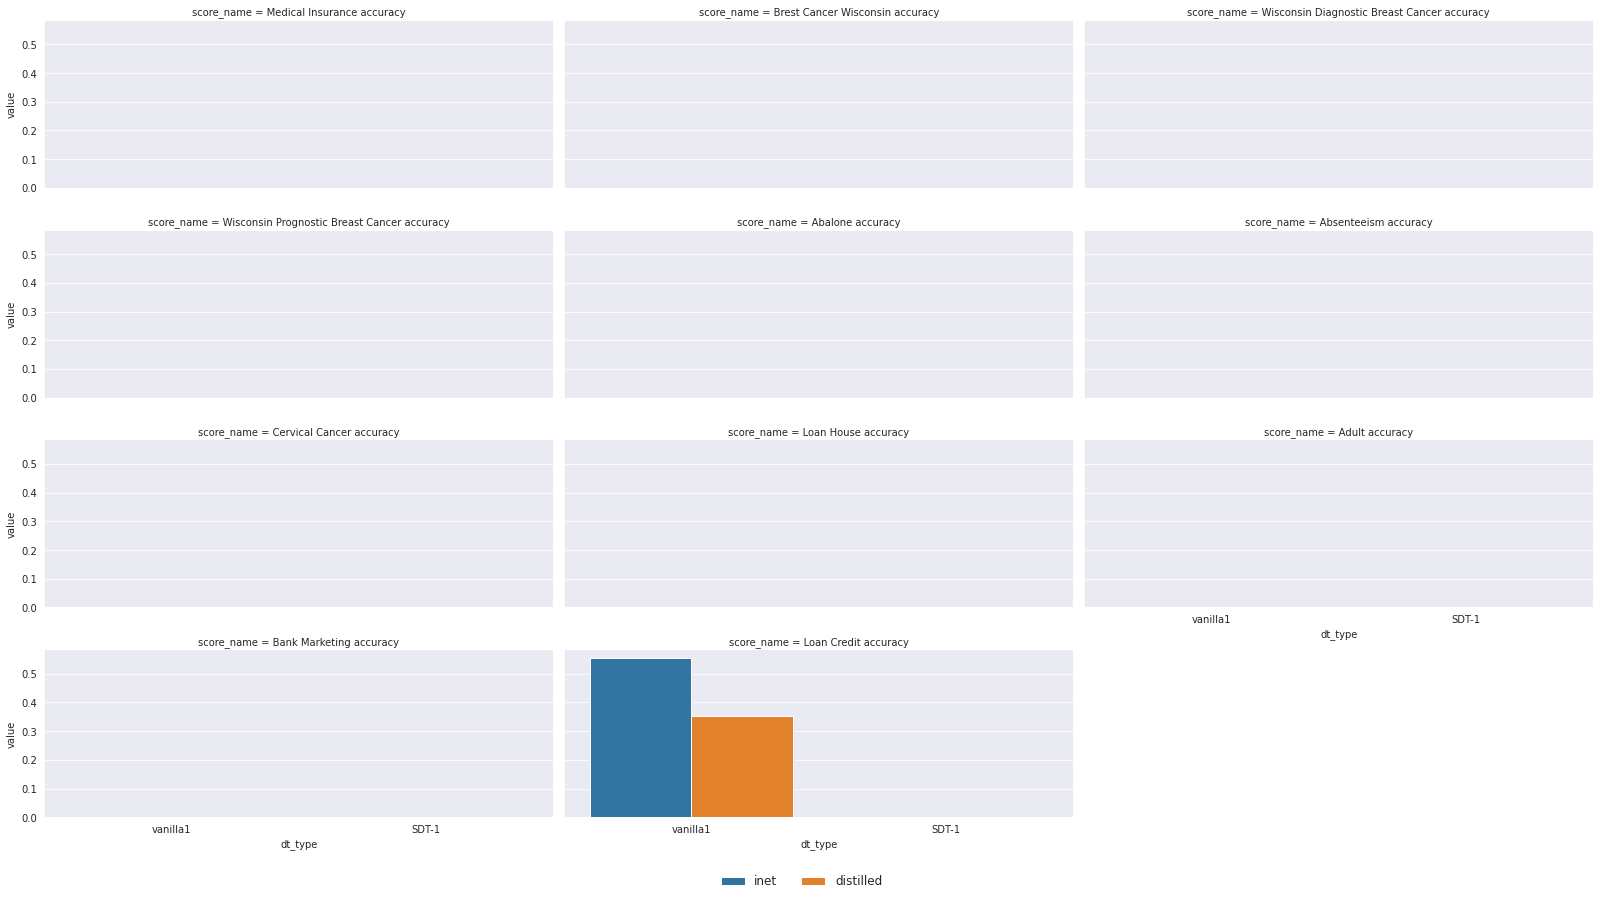

In [17]:
#real_world_scores_df_adjusted_plotting

real_world_scores_df_adjusted_plotting = real_world_scores_df_adjusted.melt(id_vars=["dt_type", "technique"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_adjusted_plotting = real_world_scores_df_adjusted_plotting[real_world_scores_df_adjusted_plotting['value'].notna()]
#real_world_scores_df_adjusted_plotting.head(10)

#plot = plot_results(real_world_scores_df_adjusted_plotting, 'score_name', 'technique', 'value', 'dt_type', plot_type=sns.barplot, aspect=2.5, col_wrap=3)
plot = plot_results(data_reduced = real_world_scores_df_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete.pdf', bbox_inches = 'tight', pad_inches = 0)

In [18]:
distribution_list = ['uniform', 'gamma', 'beta', 'poisson', 'normal']

columns = flatten_list(['dt_type', 'technique', 'distrib', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
empty_data_distilled = np.array([[
             #flatten_list(['vanilla1', 'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             flatten_list(['vanilla1', 'distilled', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT1',  'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT1',  'distilled', distrib, [np.nan for _ in range(len(columns)-3)]]),
             #flatten_list(['SDT-1',  'inet', distrib, [np.nan for _ in range(len(columns)-3)]]),
             flatten_list(['SDT-1',  'distilled', distrib, [np.nan for _ in range(len(columns)-3)]])] for distrib in distribution_list] )

empty_data_distilled = empty_data_distilled.reshape(empty_data_distilled.shape[0]*empty_data_distilled.shape[1], -1)

empty_data_inet = np.array([
                    flatten_list(['vanilla1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                    #flatten_list(['SDT1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                    flatten_list(['SDT-1', 'inet', 'inet', [np.nan for _ in range(len(columns)-3)]]),
                  ])

empty_data = np.vstack([empty_data_inet, empty_data_distilled])
empty_data[:,3:] = np.nan_to_num(x=empty_data[:,3:].astype(np.float64), nan=0)

real_world_scores_df_distrib_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_distrib_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (row['distrib'] in column_name and 
                        real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name):
                        if relevant_column is None:
                            relevant_column = column_name
                        else:
                            relevant_column = column_name
                            print('DOUBLE')
                try:
                    if row['technique'] == 'distilled':
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]

                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                    else:
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                        relevant_column = score_name + '_' + real_world_dataset_name + '_10000'
                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_distrib_adjusted.iloc[:,3:] = real_world_scores_df_distrib_adjusted.iloc[:,3:].astype(float)
real_world_scores_df_distrib_adjusted.head(100)           

DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE
DOUBLE


dt_type  technique  distrib Titanic accuracy Medical Insurance accuracy  \
0   vanilla1       inet     inet              0.0                        0.0   
1      SDT-1       inet     inet              0.0                        0.0   
2   vanilla1  distilled  uniform              0.0                        0.0   
3      SDT-1  distilled  uniform              0.0                        0.0   
4   vanilla1  distilled    gamma              0.0                        0.0   
5      SDT-1  distilled    gamma              0.0                        0.0   
6   vanilla1  distilled     beta              0.0                        0.0   
7      SDT-1  distilled     beta              0.0                        0.0   
8   vanilla1  distilled  poisson              0.0                        0.0   
9      SDT-1  distilled  poisson              0.0                        0.0   
10  vanilla1  distilled   normal              0.0                        0.0   
11     SDT-1  distilled   normal              0.0                        0.0   

   Brest Cancer Wisconsin accuracy  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   
5                              0.0   
6                              0.0   
7                              0.0   
8                              0.0   
9                              0.0   
10                             0.0   
11                             0.0   

   Wisconsin Diagnostic Breast Cancer accuracy  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
5                                          0.0   
6                                          0.0   
7                                          0.0   
8                                          0.0   
9                                          0.0   
10                                         0.0   
11                                         0.0   

   Wisconsin Prognostic Breast Cancer accuracy Abalone accuracy  \
0                                          0.0              0.0   
1                                          0.0              0.0   
2                                          0.0              0.0   
3                                          0.0              0.0   
4                                          0.0              0.0   
5                                          0.0              0.0   
6                                          0.0              0.0   
7                                          0.0              0.0   
8                                          0.0              0.0   
9                                          0.0              0.0   
10                                         0.0              0.0   
11                                         0.0              0.0   

   Absenteeism accuracy Cervical Cancer accuracy Loan House accuracy  \
0                   0.0                      0.0                 0.0   
1                   0.0                      0.0                 0.0   
2                   0.0                      0.0                 0.0   
3                   0.0                      0.0                 0.0   
4                   0.0                      0.0                 0.0   
5                   0.0                      0.0                 0.0   
6                   0.0                      0.0                 0.0   
7                   0.0                      0.0                 0.0   
8                   0.0                      0.0                 0.0   
9                   0.0                      0.0                 0.0   
10                  0.0                      0.0                 0.0   
11                  0.0                      0.0                 0.0   

   Adult 

/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


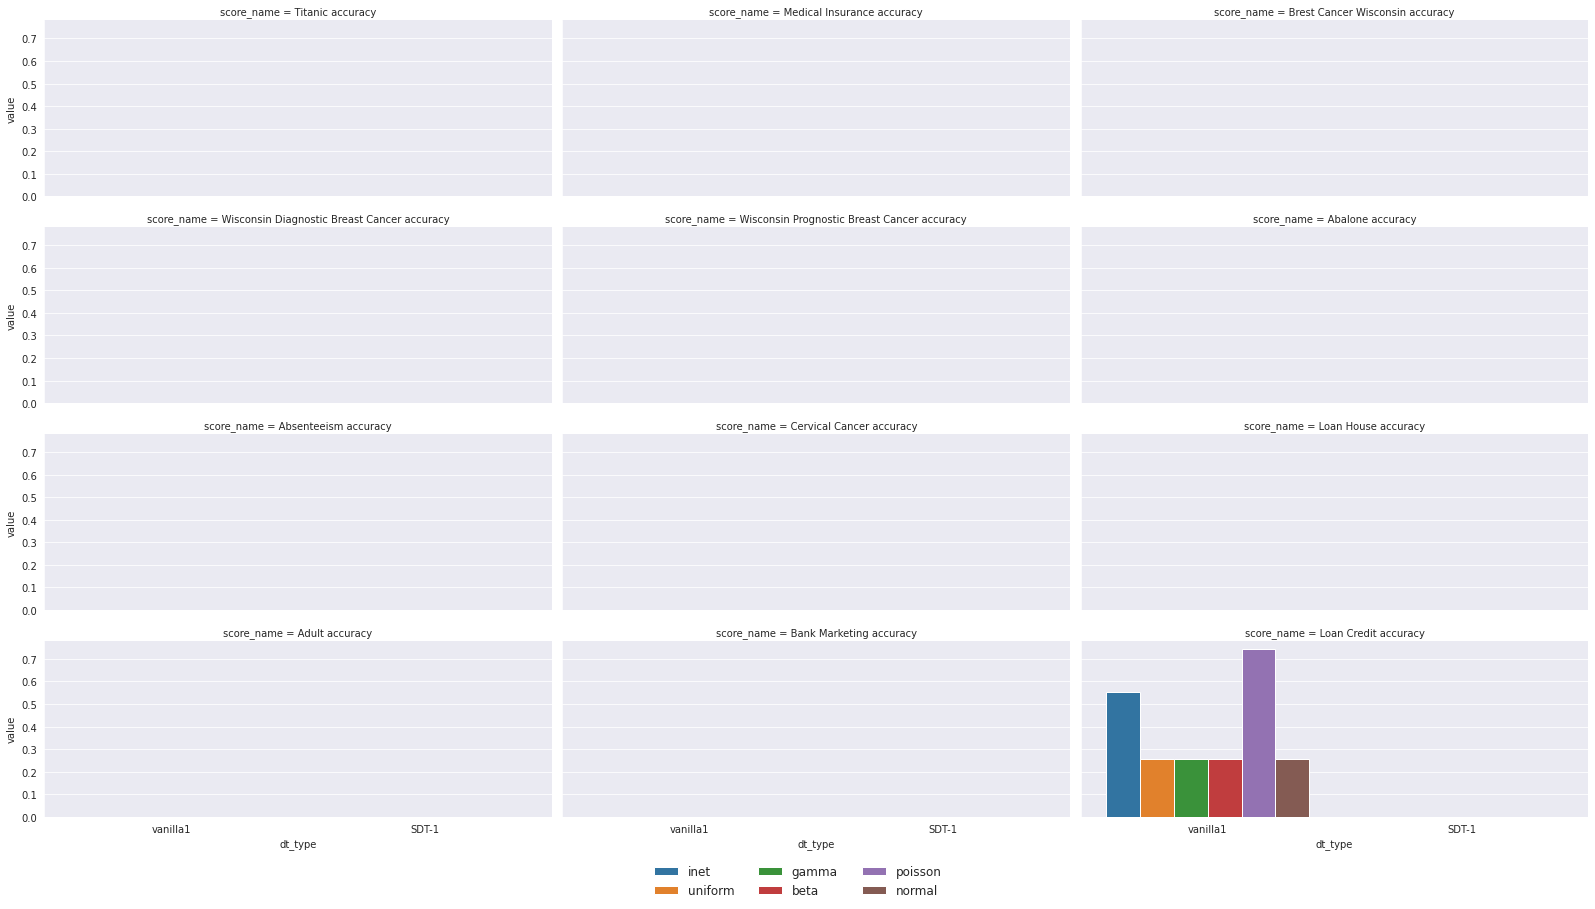

In [19]:

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted.melt(id_vars=["dt_type", "technique", "distrib"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted_plotting[real_world_scores_df_distrib_adjusted_plotting['value'].notna()]
real_world_scores_df_distrib_adjusted_plotting['distrib'] = pd.Categorical(real_world_scores_df_distrib_adjusted_plotting['distrib'], flatten_list(['inet', distribution_list]))
real_world_scores_df_distrib_adjusted_plotting.sort_values('distrib')

#real_world_scores_df_distrib_adjusted_plotting.head(10)


plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


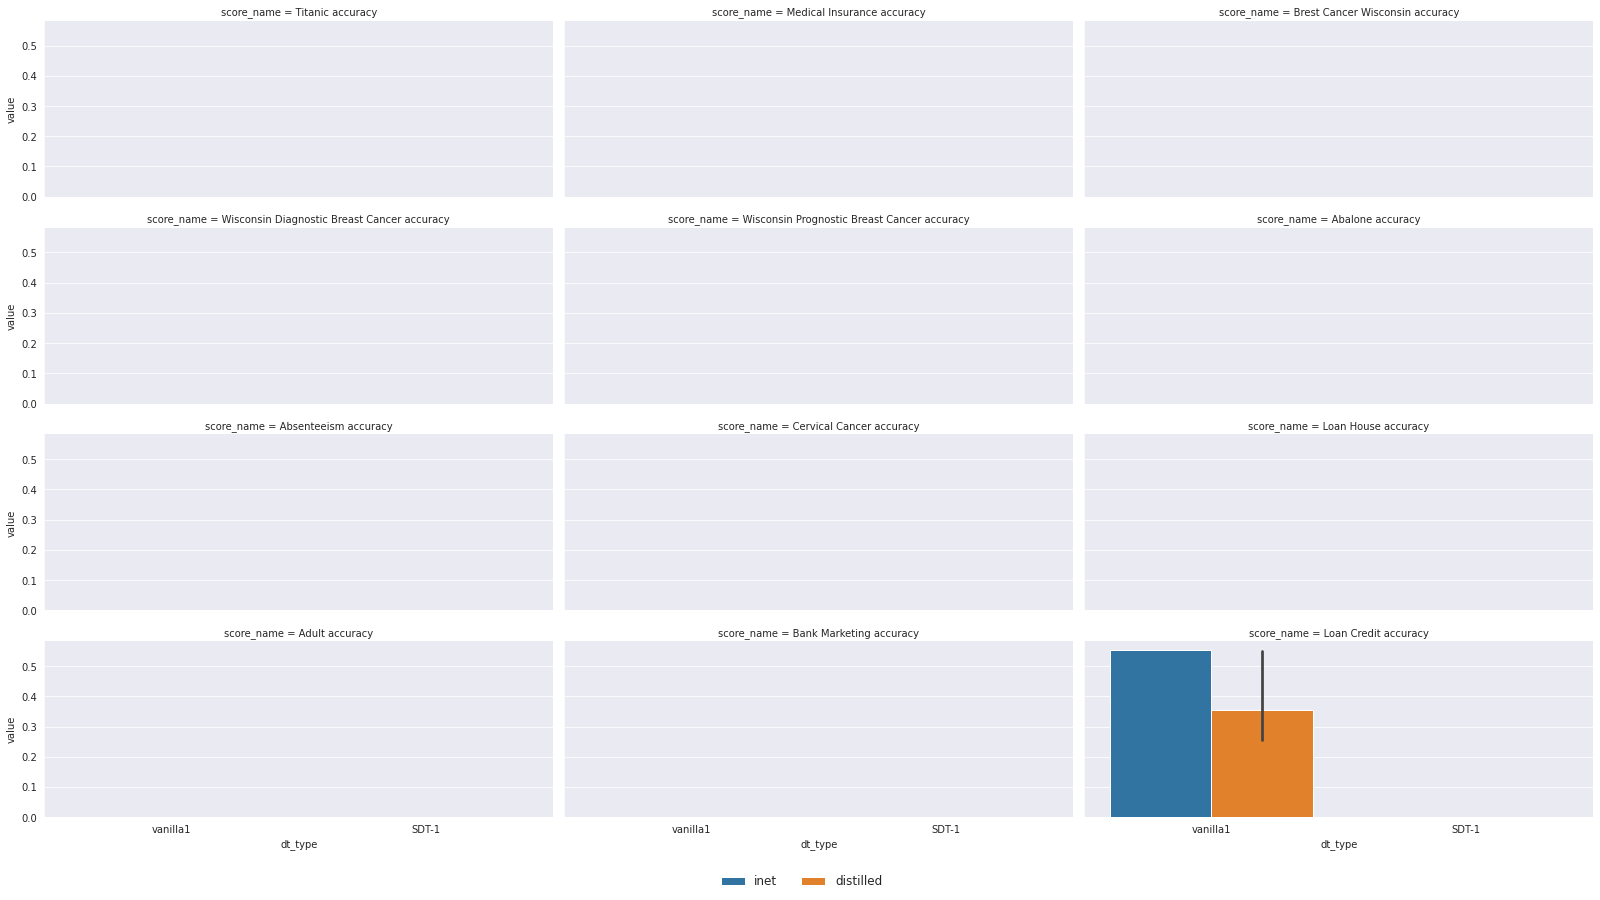

In [20]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)


/home/smarton/anaconda3/envs/XAI/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


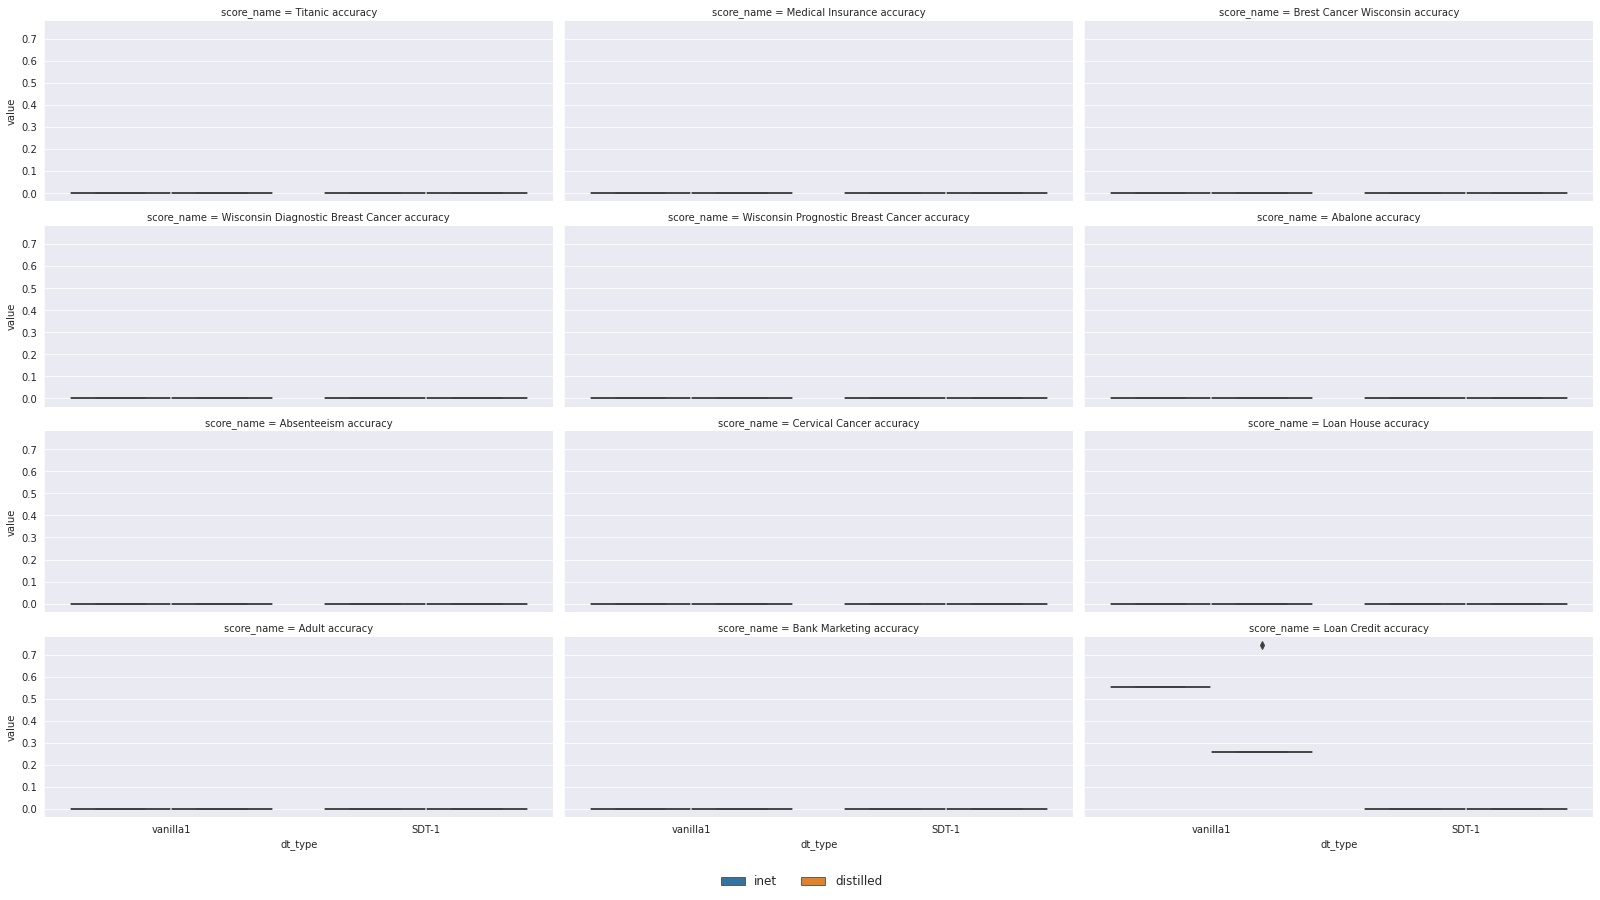

In [21]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_distrib.pdf', bbox_inches = 'tight', pad_inches = 0)
